In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.fftpack as sft

# importing Qiskit
from qiskit.providers.ibmq import least_busy
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
from qiskit.visualization import plot_histogram

In [14]:
list1 = []
list2 = []
for i in range (1,385,1):
    qpe = QuantumCircuit(1, 1)
    qpe.h(0)
    qpe.rz((-16+(i/12.0))*math.pi,0)
    list1.append((-16+(i/12.0))*math.pi/2)
    qpe.ry(math.pi/2,0)
    qpe.measure(0,0)
    aer_sim = Aer.get_backend('aer_simulator')
    shots = 4096
    t_qpe = transpile(qpe, aer_sim)
    qobj = assemble(t_qpe, shots=shots)
    results = aer_sim.run(qobj).result()
    answer = results.get_counts()

    if len(answer) == 1:
        lst = list(answer.keys())
        if int(lst[0]) == 1:
                answer['0'] = 0
        elif int(lst[0]) == 0:
                answer['1'] = 0
    a = answer['1']
    b = answer['0']
    y = (a**2-b**2)/(shots**2)
    list2.append(y)


/tmp/ipykernel_64/919693023.py:14: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


# Plotting of Calculations

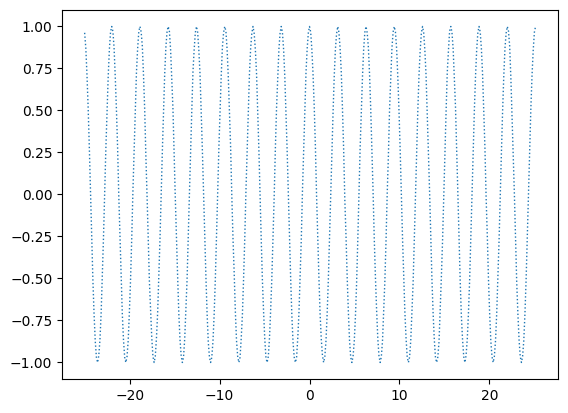

In [15]:
xvals = list1
yvals = list2

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted')


# Fourier Trasform

(-5.0, 5.0)

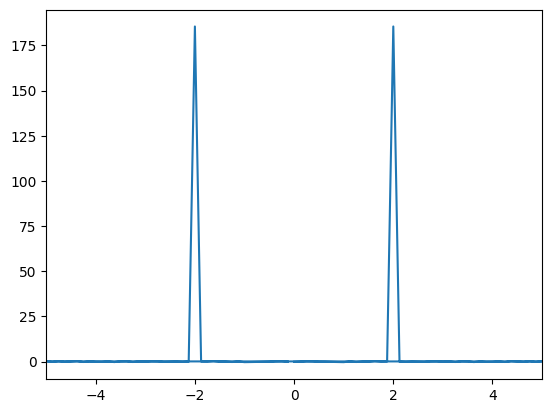

In [5]:
dx = xvals[1]-xvals[0]
N = len(xvals)
y_k = sft.fft(yvals)
psi = sft.fftfreq(N, dx)
k = 2*np.pi*psi
plt.plot(k, y_k)
plt.xlim(-5,5)

# Experiment with Real Device

In [9]:
list3 = []
list4 = []
for i in range (1,385,1):
    qpe = QuantumCircuit(1, 1)
    qpe.h(0)
    qpe.rz((-16+(i/12.0))*math.pi,0)
    list3.append((-16+(i/12.0))*math.pi/2)
    qpe.ry(math.pi/2,0)
    qpe.measure(0,0)
    
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
    n = 2
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                       not x.configuration().simulator and x.status().operational==True))
    print("least busy backend: ", backend)
    
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
    from qiskit.tools.monitor import job_monitor
    transpiled_qpe = transpile(qpe, backend, optimization_level=3)
    job = backend.run(transpiled_qpe)
    job_monitor(job, interval=2)
    results = job.result()
    answer = results.get_counts()
    if len(answer) == 1:
        lst = list(answer.keys())
        if int(lst[0]) == 1:
                answer['0'] = 0
        elif int(lst[0]) == 0:
                answer['1'] = 0
    a = answer['1']
    b = answer['0']
    y = (a**2-b**2)/(shots**2)
    list4.append(y)
    #print(i, answer)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'